# 绘图工具pyplot

`matplotlib.pylot`是matplotlib的绘图工具


我们将会由一个绘制sin(x)曲线的例子开始,由简单到复杂的学习这个库


## 最简单的实现

最基本的函数就是`plt.plot()`了,它会产生一个图形,

In [1]:
import matplotlib.pyplot as plt
import pylab

In [2]:
%matplotlib inline

In [3]:
import numpy as np

In [4]:
plt.style.use('chinese_support')

In [5]:
X = np.linspace(-np.pi, np.pi, 256,endpoint=True)

In [6]:
C,S = np.cos(X), np.sin(X)

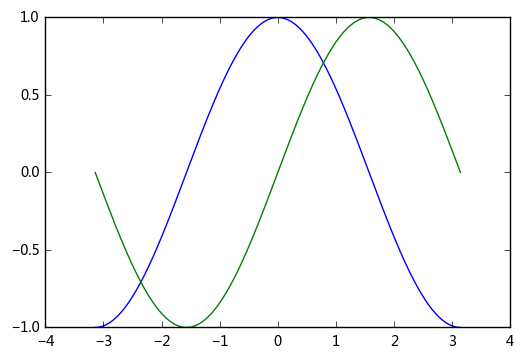

In [7]:
plt.plot(X,C);plt.plot(X,S)

## 修改一些设置

plot接收参数,可以使用color指定线的颜色,用linewidth指定线条粗细,linestyle指定线条形状

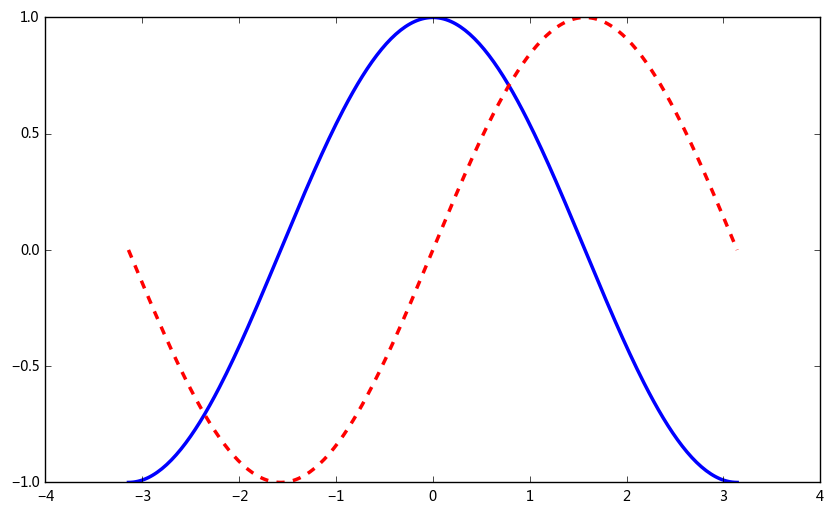

In [8]:
plt.figure(figsize=(10,6), dpi=80)#设置图片大小和dpi
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-");plt.plot(X, S, color="red",  linewidth=2.5, linestyle="--")

### 边界扩大

我们可以i为plt对象绑定xlim和ylim来指定坐标轴的范围

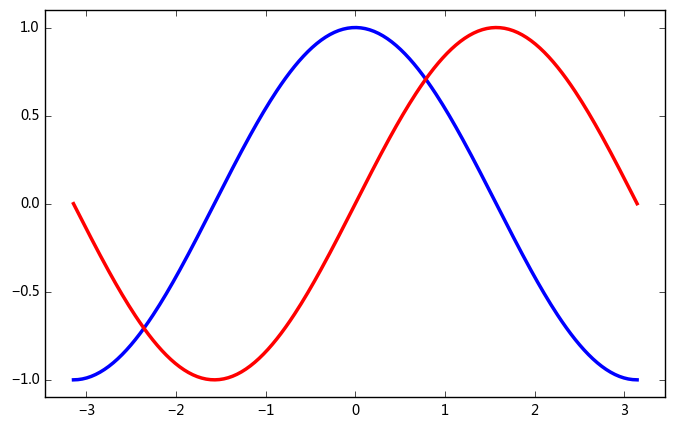

In [9]:
plt.figure(figsize=(8,5), dpi=80)#设置图片大小和dpi
plt.subplot(111)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")
plt.xlim(X.min()*1.1, X.max()*1.1)#边界扩大1.1倍
plt.ylim(C.min()*1.1,C.max()*1.1)#边界扩大1.1倍

plt.show()

### 设置y轴记号标签

xtick和ytick则是可以接收一个序列来确定刻度

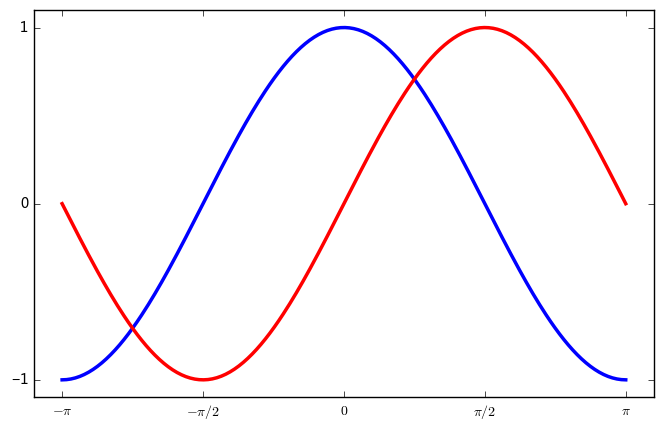

In [10]:
plt.figure(figsize=(8,5), dpi=80)#设置图片大小和dpi
plt.subplot(111)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")
plt.xlim(X.min()*1.1, X.max()*1.1)#边界扩大1.1倍
plt.ylim(C.min()*1.1,C.max()*1.1)#边界扩大1.1倍
plt.xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$',r'$-\pi / 2$',r'$0$',r'$\pi / 2$',r'$\pi$'])#设置x轴记号标签,用latex符号替代具体数
plt.yticks([-1, 0, +1])#设置y轴记号标签

plt.show()

### 移动脊柱

实际上每幅图有四条脊柱（上下左右），为了将脊柱放在图的中间，我们必须将其中的两条（上和右）设置为无色，然后调整剩下的两条到合适的位置——数据空间的 0 点。

脊柱使用对象gca来操作
它有

+ .spines选择'right','top','bottom','left'来确定要操作的是哪条脊柱
+ .set_color设置颜色
+ .set_position设定位置

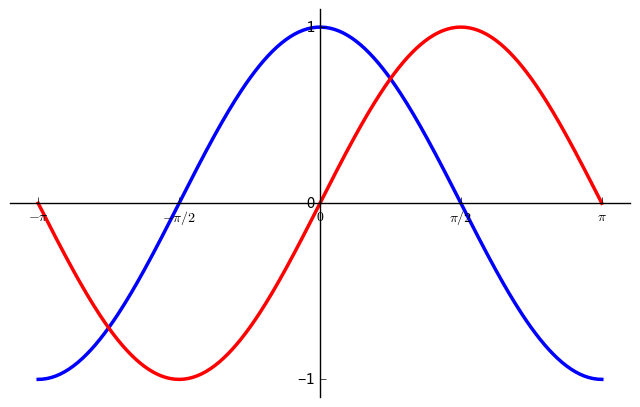

In [11]:
plt.figure(figsize=(8,5), dpi=80)#设置图片大小和dpi
plt.subplot(111)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")
plt.xlim(X.min()*1.1, X.max()*1.1)#边界扩大1.1倍
plt.ylim(C.min()*1.1,C.max()*1.1)#边界扩大1.1倍
plt.xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$',r'$-\pi / 2$',r'$0$',r'$\pi / 2$',r'$\pi$'])#设置x轴记号标签,用latex符号替代具体数
plt.yticks([-1, 0, +1])#设置y轴记号标签

ax = plt.gca()#脊柱
ax.spines['right'].set_color('none')#右脊柱设为无色
ax.spines['top'].set_color('none')#上脊柱设为无色
ax.xaxis.set_ticks_position('bottom')#下脊柱设定位置
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')#左脊柱设定位置
ax.spines['left'].set_position(('data',0))
plt.show()

### 图例

`plt.legend(loc=<str>)`可以用来初始化图例位置

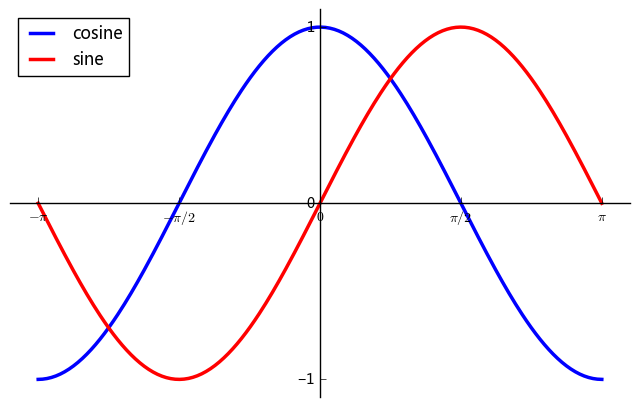

In [12]:
plt.figure(figsize=(8,5), dpi=80)#设置图片大小和dpi
plt.subplot(111)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-",label="cosine")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-",label="sine")

plt.legend(loc='upper left')#图例位置

plt.xlim(X.min()*1.1, X.max()*1.1)#边界扩大1.1倍
plt.ylim(C.min()*1.1,C.max()*1.1)#边界扩大1.1倍
plt.xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$',r'$-\pi / 2$',r'$0$',r'$\pi / 2$',r'$\pi$'])#设置x轴记号标签,用latex符号替代具体数
plt.yticks([-1, 0, +1])#设置y轴记号标签

ax = plt.gca()#脊柱
ax.spines['right'].set_color('none')#右脊柱设为无色
ax.spines['top'].set_color('none')#上脊柱设为无色
ax.xaxis.set_ticks_position('bottom')#下脊柱设定位置
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')#左脊柱设定位置
ax.spines['left'].set_position(('data',0))
plt.show()

### 给一些特殊点做注释

我们希望在 $2\pi/3$ 的位置给两条函数曲线加上一个注释。首先，我们在对应的函数图像位置上画一个点；然后，向横轴引一条垂线，以虚线标记；最后，写上标签。

+ plt.text可以在图上指定位置配上文字
+ plt.annotate可以用来画出图片上的说明文字
+ plt.plot用来画直线
+ plt.scatter 可以用来画交点

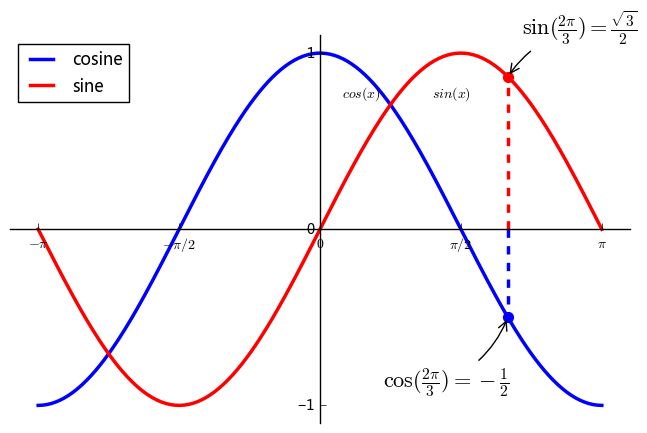

In [13]:
plt.figure(figsize=(8,5), dpi=80)#设置图片大小和dpi
plt.subplot(111)

plt.text(0.25, 0.75, r'$cos(x)$')
plt.text(1.25, 0.75, r'$sin(x)$')
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-",label="cosine")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-",label="sine")

plt.legend(loc='upper left')#图例位置

plt.xlim(X.min()*1.1, X.max()*1.1)#边界扩大1.1倍
plt.ylim(C.min()*1.1,C.max()*1.1)#边界扩大1.1倍
plt.xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$',r'$-\pi / 2$',r'$0$',r'$\pi / 2$',r'$\pi$'])#设置x轴记号标签,用latex符号替代具体数
plt.yticks([-1, 0, +1])#设置y轴记号标签

ax = plt.gca()#脊柱
ax.spines['right'].set_color('none')#右脊柱设为无色
ax.spines['top'].set_color('none')#上脊柱设为无色
ax.xaxis.set_ticks_position('bottom')#下脊柱设定位置
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')#左脊柱设定位置
ax.spines['left'].set_position(('data',0))


t = 2*np.pi/3 #特殊点x轴位置
plt.plot([t,t],[0,np.cos(t)], color ='blue', linewidth=2.5, linestyle="--")#竖线从0到与cos(t)交点,蓝色虚线
plt.scatter([t,],[np.cos(t),], 50, color ='blue')# 画交点

plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
         xy=(t, np.sin(t)), xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))#指出交点并说明公式

plt.plot([t,t],[0,np.sin(t)], color ='red', linewidth=2.5, linestyle="--")#竖线从0到与sin(t)交点,红色虚线
plt.scatter([t,],[np.sin(t),], 50, color ='red')# 画交点

plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
         xy=(t, np.cos(t)), xycoords='data',
         xytext=(-90, -50), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))#指出交点并说明公式

plt.show()

### 精益求精

坐标轴上的记号标签被曲线挡住了，作为强迫症患者这是不能忍的。我们可以把它们放大，然后添加一个白色的半透明底色。这样可以保证标签和曲线同时可见。

并且我们给图片加上格子


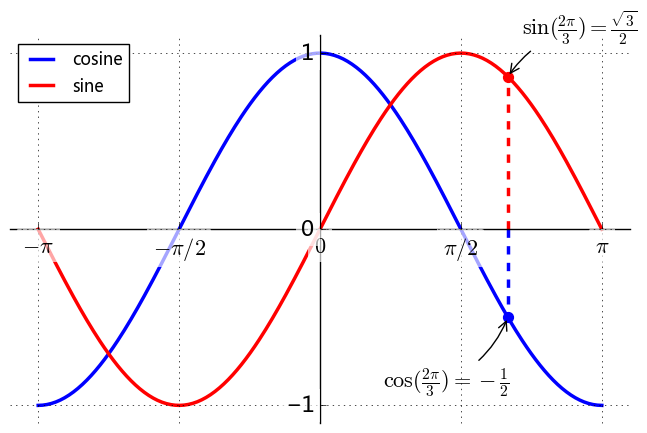

In [14]:
plt.figure(figsize=(8,5), dpi=80)#设置图片大小和dpi
plt.subplot(111)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-",label="cosine")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-",label="sine")

plt.legend(loc='upper left')#图例位置

plt.xlim(X.min()*1.1, X.max()*1.1)#边界扩大1.1倍
plt.ylim(C.min()*1.1,C.max()*1.1)#边界扩大1.1倍
plt.xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$',r'$-\pi / 2$',r'$0$',r'$\pi / 2$',r'$\pi$'])#设置x轴记号标签,用latex符号替代具体数
plt.yticks([-1, 0, +1])#设置y轴记号标签

ax = plt.gca()#脊柱
ax.spines['right'].set_color('none')#右脊柱设为无色
ax.spines['top'].set_color('none')#上脊柱设为无色
ax.xaxis.set_ticks_position('bottom')#下脊柱设定位置
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')#左脊柱设定位置
ax.spines['left'].set_position(('data',0))

# 添加一个白色的半透明底色
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))

t = 2*np.pi/3 #特殊点x轴位置
plt.plot([t,t],[0,np.cos(t)], color ='blue', linewidth=2.5, linestyle="--")#竖线从0到与cos(t)交点,蓝色虚线
plt.scatter([t,],[np.cos(t),], 50, color ='blue')# 画交点

plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
         xy=(t, np.sin(t)), xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))#指出交点并说明公式

plt.plot([t,t],[0,np.sin(t)], color ='red', linewidth=2.5, linestyle="--")#竖线从0到与sin(t)交点,红色虚线
plt.scatter([t,],[np.sin(t),], 50, color ='red')# 画交点

plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
         xy=(t, np.cos(t)), xycoords='data',
         xytext=(-90, -50), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))#指出交点并说明公式

plt.grid(True)
plt.show()

### 填充颜色
fill_between方法来填充两个线条间的内容

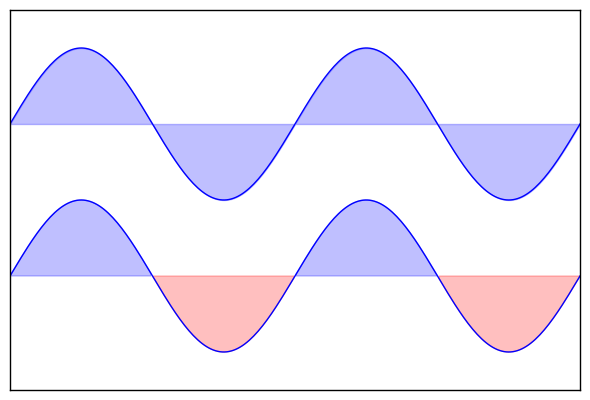

In [15]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.axes([0.025,0.025,0.95,0.95])

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.fill_between(X, 1, Y+1, color='blue', alpha=.25)

plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X, -1, Y-1, (Y-1) > -1, color='blue', alpha=.25)
plt.fill_between(X, -1, Y-1, (Y-1) < -1, color='red',  alpha=.25)

plt.xlim(-np.pi,np.pi), plt.xticks([])
plt.ylim(-2.5,2.5), plt.yticks([])
plt.show()

## 图像、子图、坐标轴和记号

到目前为止，我们都用隐式的方法来绘制图像和坐标轴。快速绘图中，这是很方便的。我们也可以显式地控制图像、子图、坐标轴。Matplotlib 中的「图像」指的是用户界面看到的整个窗口内容。在图像里面有所谓「子图」。子图的位置是由坐标网格确定的，而「坐标轴」却不受此限制，可以放在图像的任意位置。我们已经隐式地使用过图像和子图：当我们调用 plot 函数的时候，matplotlib 调用 gca() 函数以及 gcf() 函数来获取当前的坐标轴和图像；如果无法获取图像，则会调用 figure() 函数来创建一个——严格地说，是用 subplot(1,1,1) 创建一个只有一个子图的图像。

### 子图像

你可以用子图来将图样（plot）放在均匀的坐标网格中。用 subplot 函数的时候，你需要指明网格的行列数量，以及你希望将图样放在哪一个网格区域中。此外，gridspec 的功能更强大，你也可以选择它来实现这个功能。


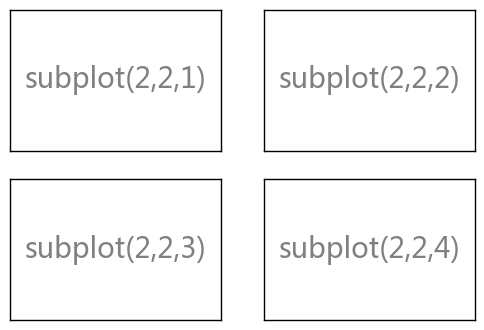

In [16]:
plt.subplot(2,2,1)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(2,2,1)',ha='center',va='center',size=20,alpha=.5)

plt.subplot(2,2,2)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(2,2,2)',ha='center',va='center',size=20,alpha=.5)

plt.subplot(2,2,3)
plt.xticks([]),plt.yticks([])
plt.text(0.5,0.5, 'subplot(2,2,3)',ha='center',va='center',size=20,alpha=.5)

plt.subplot(2,2,4)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(2,2,4)',ha='center',va='center',size=20,alpha=.5)

# savefig('../figures/subplot-grid.png', dpi=64)
plt.show()

### 格子grid

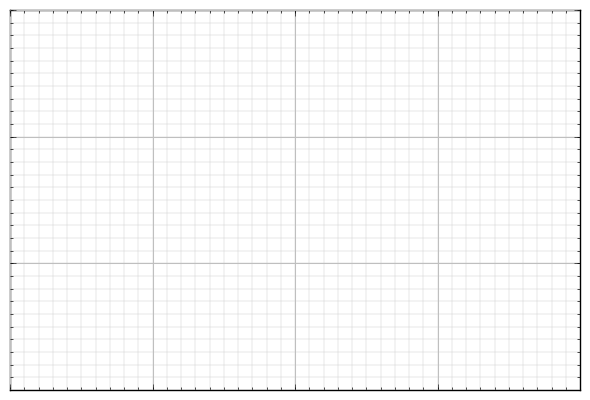

In [34]:
ax = plt.axes([0.025,0.025,0.95,0.95])

ax.set_xlim(0,4)
ax.set_ylim(0,3)
ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')
ax.set_xticklabels([])
ax.set_yticklabels([])


plt.show()

### 多重网格

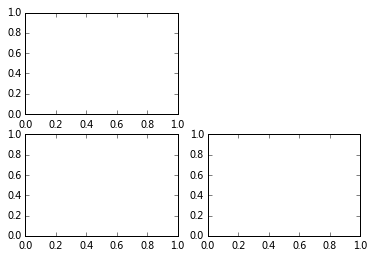

In [41]:
plt.subplot(2,2,1)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

plt.show()

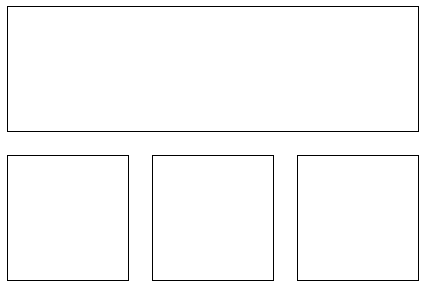

In [42]:
fig = plt.figure()
fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)

plt.subplot(2,1,1)
plt.xticks([]), plt.yticks([])

plt.subplot(2,3,4)
plt.xticks([]), plt.yticks([])

plt.subplot(2,3,5)
plt.xticks([]), plt.yticks([])

plt.subplot(2,3,6)
plt.xticks([]), plt.yticks([])

plt.show()

### 坐标轴

坐标轴和子图功能类似，不过它可以放在图像的任意位置。因此，如果你希望在一副图中绘制一个小图，就可以用这个功能。

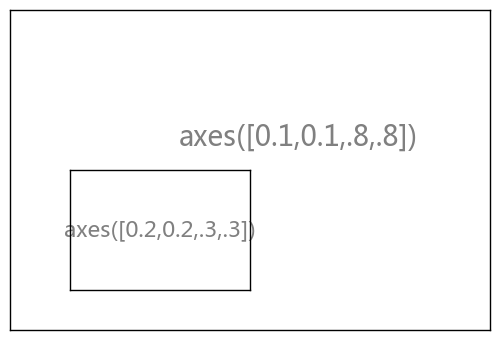

In [17]:
plt.axes([0.1,0.1,.8,.8])
plt.xticks([]), plt.yticks([])
plt.text(0.6,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

plt.axes([0.2,0.2,.3,.3])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'axes([0.2,0.2,.3,.3])',ha='center',va='center',size=16,alpha=.5)

#plt.savefig("../figures/axes.png",dpi=64)
plt.show()

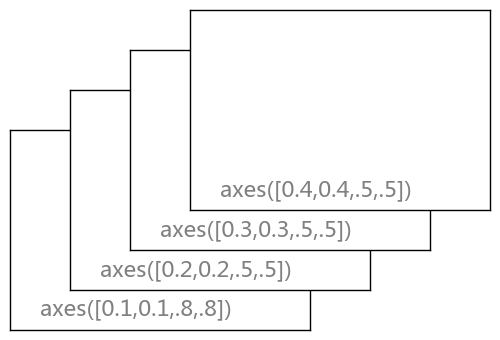

In [18]:
plt.axes([0.1,0.1,.5,.5])
plt.xticks([]), plt.yticks([])
plt.text(0.1,0.1, 'axes([0.1,0.1,.8,.8])',ha='left',va='center',size=16,alpha=.5)

plt.axes([0.2,0.2,.5,.5])
plt.xticks([]), plt.yticks([])
plt.text(0.1,0.1, 'axes([0.2,0.2,.5,.5])',ha='left',va='center',size=16,alpha=.5)

plt.axes([0.3,0.3,.5,.5])
plt.xticks([]), plt.yticks([])
plt.text(0.1,0.1, 'axes([0.3,0.3,.5,.5])',ha='left',va='center',size=16,alpha=.5)

plt.axes([0.4,0.4,.5,.5])
plt.xticks([]), plt.yticks([])
plt.text(0.1,0.1, 'axes([0.4,0.4,.5,.5])',ha='left',va='center',size=16,alpha=.5)

# plt.savefig("../figures/axes-2.png",dpi=64)
plt.show()

### 记号

良好的记号是图像的重要组成部分。Matplotlib 里的记号系统里的各个细节都是可以由用户个性化配置的。你可以用 Tick Locators 来指定在那些位置放置记号，用 Tick Formatters 来调整记号的样式。主要和次要的记号可以以不同的方式呈现。默认情况下，每一个次要的记号都是隐藏的，也就是说，默认情况下的次要记号列表是空的——NullLocator。

下面有为不同需求设计的一些 Locators:

+ NullLocator	
No ticks.


+ IndexLocator	
Place a tick on every multiple of some base number of points plotted.


+ FixedLocator	
Tick locations are fixed.


+ LinearLocator	
Determine the tick locations.


+ MultipleLocator	
Set a tick on every integer that is multiple of some base.


+ AutoLocator	
Select no more than n intervals at nice locations.


+ LogLocator	
Determine the tick locations for log axes.




## 特殊图形

除了点线等基本工具,还可以直接使用设置好的类型画一些基本图形

### 散点图scatter



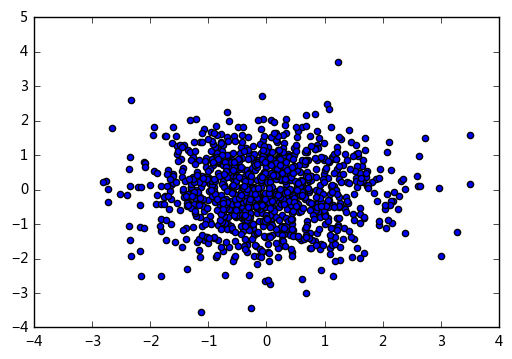

In [19]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()

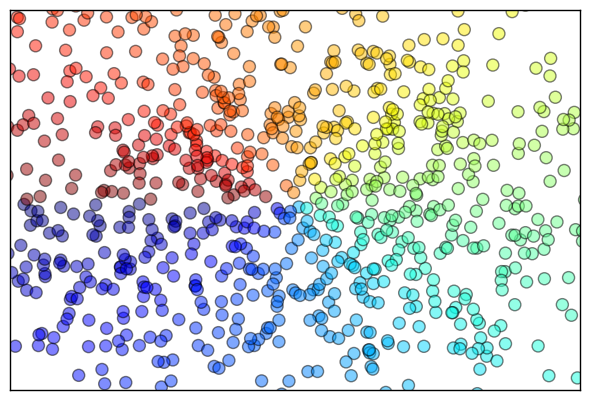

In [20]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X) # 计算出象限


plt.axes([0.025,0.025,0.95,0.95])
plt.scatter(X,Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5,1.5), plt.xticks([])
plt.ylim(-1.5,1.5), plt.yticks([])
                   
plt.show()

### 栅栏图bar


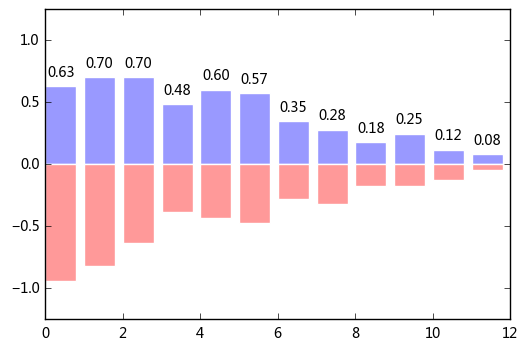

In [21]:
n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x,y in zip(X,Y1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')

plt.ylim(-1.25,+1.25)
plt.show()

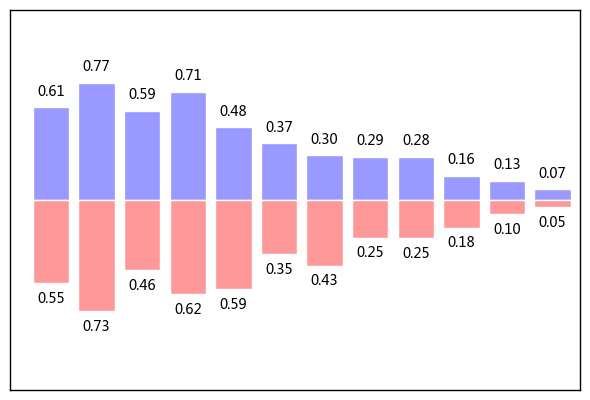

In [22]:
n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)

plt.axes([0.025,0.025,0.95,0.95])
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x,y in zip(X,Y1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X,Y2):
    plt.text(x+0.4, -y-0.05, '%.2f' % y, ha='center', va= 'top')

plt.xlim(-.5,n), plt.xticks([])
plt.ylim(-1.25,+1.25), plt.yticks([])

plt.show()

### 等高线图meshgrid

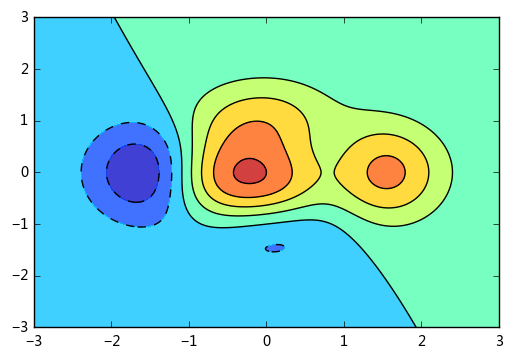

In [23]:
def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

plt.contourf(X, Y, f(X,Y), 8, alpha=.75, cmap='jet')
C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)
plt.show()

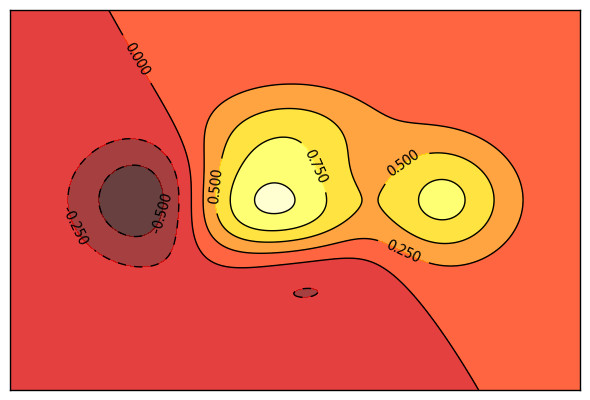

In [24]:
def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

plt.axes([0.025,0.025,0.95,0.95])

plt.contourf(X, Y, f(X,Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)
plt.clabel(C, inline=1, fontsize=10)

plt.xticks([]), plt.yticks([])

plt.show()

### 灰度图（Imshow）

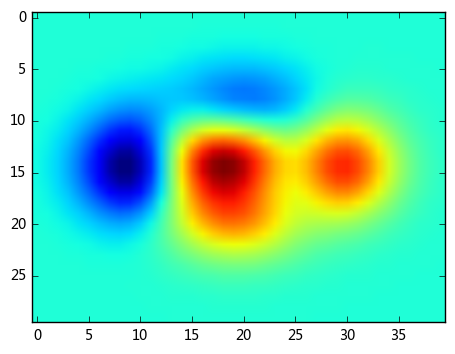

In [25]:
def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
n = 10
x = np.linspace(-3,3,4*n)
y = np.linspace(-3,3,3*n)
X,Y = np.meshgrid(x,y)
plt.imshow(f(X,Y))
plt.show()

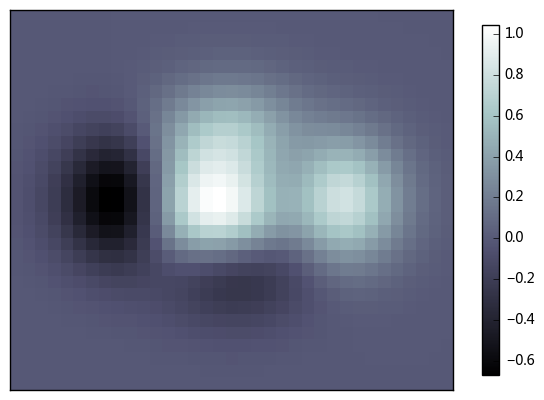

In [26]:
def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 10
x = np.linspace(-3,3,3.5*n)
y = np.linspace(-3,3,3.0*n)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

plt.axes([0.025,0.025,0.95,0.95])
plt.imshow(Z,interpolation='nearest', cmap='bone', origin='lower')
plt.colorbar(shrink=.92)

plt.xticks([]), plt.yticks([])
plt.show()

### 饼状图

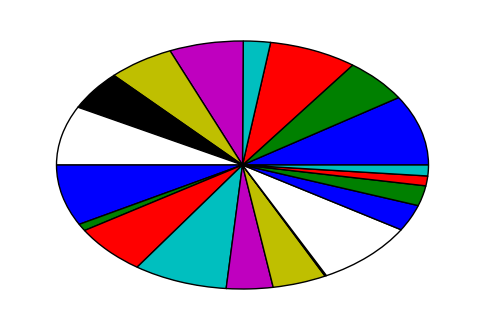

In [27]:
n = 20
Z = np.random.uniform(0,1,n)
plt.pie(Z)
plt.show()

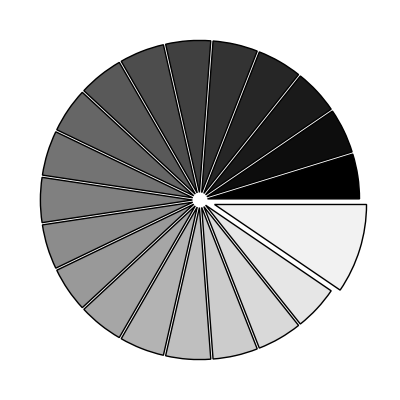

In [28]:
n = 20
Z = np.ones(n)
Z[-1] *= 2

plt.axes([0.025,0.025,0.95,0.95])

plt.pie(Z, explode=Z*.05, colors = ['%f' % (i/float(n)) for i in range(n)])
plt.gca().set_aspect('equal')
plt.xticks([]), plt.yticks([])

plt.show()

### 柱状图hist



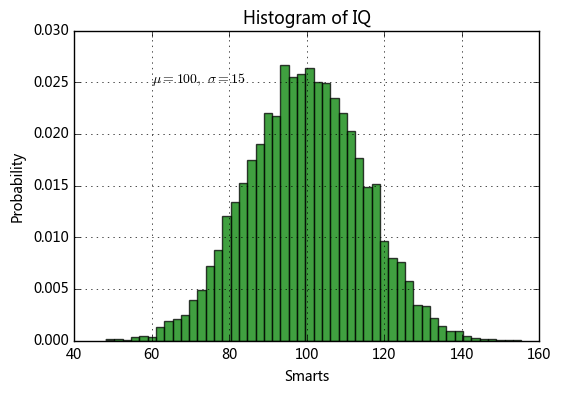

In [29]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

### 量场图--箭头（Quiver Plots）

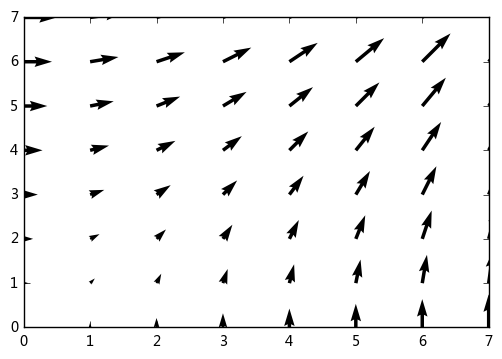

In [30]:
n = 8
X,Y = np.mgrid[0:n,0:n]
plt.quiver(X,Y)
plt.show()

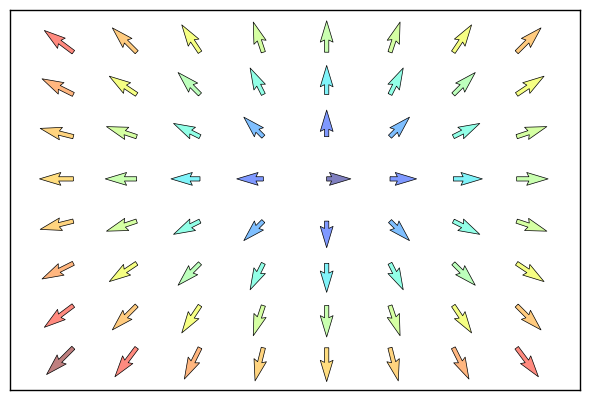

In [31]:
n = 8
X,Y = np.mgrid[0:n,0:n]
T = np.arctan2(Y-n/2.0, X-n/2.0)
R = 10+np.sqrt((Y-n/2.0)**2+(X-n/2.0)**2)
U,V = R*np.cos(T), R*np.sin(T)

plt.axes([0.025,0.025,0.95,0.95])
plt.quiver(X,Y,U,V,R, alpha=.5)
plt.quiver(X,Y,U,V, edgecolor='k', facecolor='None', linewidth=.5)

plt.xlim(-1,n), plt.xticks([])
plt.ylim(-1,n), plt.yticks([])

plt.show()

### 极轴图

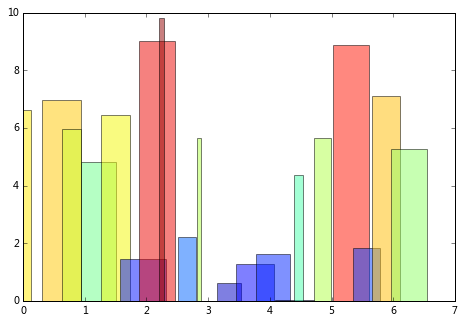

In [43]:
plt.axes([0,0,1,1])

N = 20
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor( plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

plt.show()

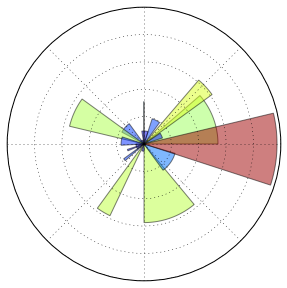

In [44]:
ax = plt.axes([0.025,0.025,0.95,0.95], polar=True)

N = 20
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor( plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

### 3D 图

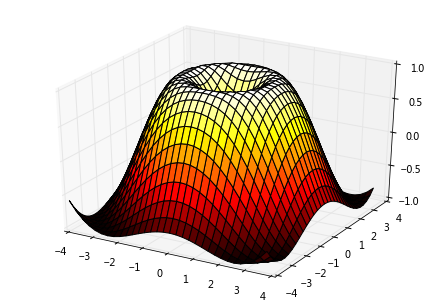

In [45]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

plt.show()

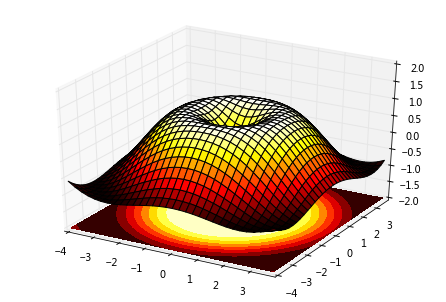

In [46]:


fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2,2)

plt.show()

### 手稿

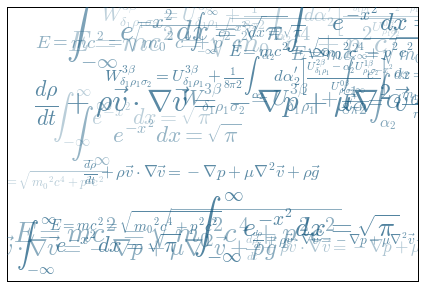

In [47]:
eqs = []
eqs.append((r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$"))
eqs.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} = -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$"))
eqs.append((r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$"))
eqs.append((r"$E = mc^2 = \sqrt{{m_0}^2c^4 + p^2c^2}$"))
eqs.append((r"$F_G = G\frac{m_1m_2}{r^2}$"))


plt.axes([0.025,0.025,0.95,0.95])

for i in range(24):
    index = np.random.randint(0,len(eqs))
    eq = eqs[index]
    size = np.random.uniform(12,32)
    x,y = np.random.uniform(0,1,2)
    alpha = np.random.uniform(0.25,.75)
    plt.text(x, y, eq, ha='center', va='center', color="#11557c", alpha=alpha,
             transform=plt.gca().transAxes, fontsize=size, clip_on=True)

plt.xticks([]), plt.yticks([])
# savefig('../figures/text_ex.png',dpi=48)
plt.show()

### 箱形图

箱形图可以用来集中化的体现数据的特点

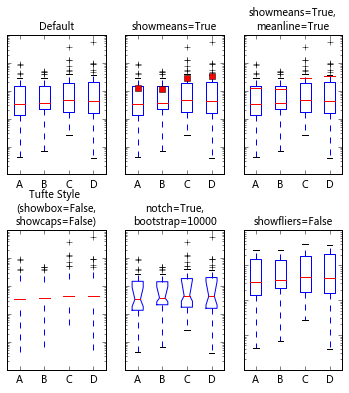

In [48]:
np.random.seed(937)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')
fs = 10  # fontsize

# demonstrate how to toggle the display of different elements:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))
axes[0, 0].boxplot(data, labels=labels)
axes[0, 0].set_title('Default', fontsize=fs)

axes[0, 1].boxplot(data, labels=labels, showmeans=True)
axes[0, 1].set_title('showmeans=True', fontsize=fs)

axes[0, 2].boxplot(data, labels=labels, showmeans=True, meanline=True)
axes[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

axes[1, 0].boxplot(data, labels=labels, showbox=False, showcaps=False)
axes[1, 0].set_title('Tufte Style \n(showbox=False,\nshowcaps=False)', fontsize=fs)

axes[1, 1].boxplot(data, labels=labels, notch=True, bootstrap=10000)
axes[1, 1].set_title('notch=True,\nbootstrap=10000', fontsize=fs)

axes[1, 2].boxplot(data, labels=labels, showfliers=False)
axes[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)
plt.show()

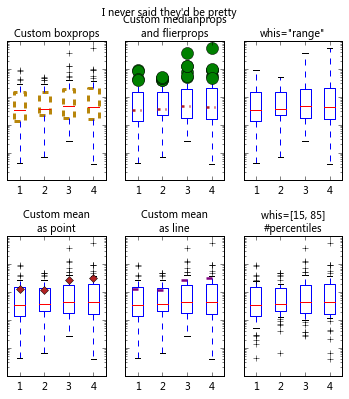

In [49]:
# demonstrate how to customize the display different elements:
boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))
axes[0, 0].boxplot(data, boxprops=boxprops)
axes[0, 0].set_title('Custom boxprops', fontsize=fs)

axes[0, 1].boxplot(data, flierprops=flierprops, medianprops=medianprops)
axes[0, 1].set_title('Custom medianprops\nand flierprops', fontsize=fs)

axes[0, 2].boxplot(data, whis='range')
axes[0, 2].set_title('whis="range"', fontsize=fs)

axes[1, 0].boxplot(data, meanprops=meanpointprops, meanline=False,
                   showmeans=True)
axes[1, 0].set_title('Custom mean\nas point', fontsize=fs)

axes[1, 1].boxplot(data, meanprops=meanlineprops, meanline=True, showmeans=True)
axes[1, 1].set_title('Custom mean\nas line', fontsize=fs)

axes[1, 2].boxplot(data, whis=[15, 85])
axes[1, 2].set_title('whis=[15, 85]\n#percentiles', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.suptitle("I never said they'd be pretty")
fig.subplots_adjust(hspace=0.4)
plt.show()


更多的图形可以在<http://matplotlib.org/api/pyplot_summary.html>中查看